# CL-I Assignment No. 1
### Name : Parkale Shreya Jagdish
### Roll No.: 2447060
### Batch : C
### Problem Statement:
Feature Transformation:  
To use PCA Algorithm for dimensionality reduction.  \
You have a dataset that includes measurements for different variables on wine 
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data 
so that most variations in the measurements of the variables are captured by a small 
number of principal components so that it is easier to distinguish between red and 
white wine by inspecting these principal components.  \
Dataset Link: https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Wine.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [10]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [11]:
df.shape

(178, 14)

<AxesSubplot:xlabel='Customer_Segment', ylabel='count'>

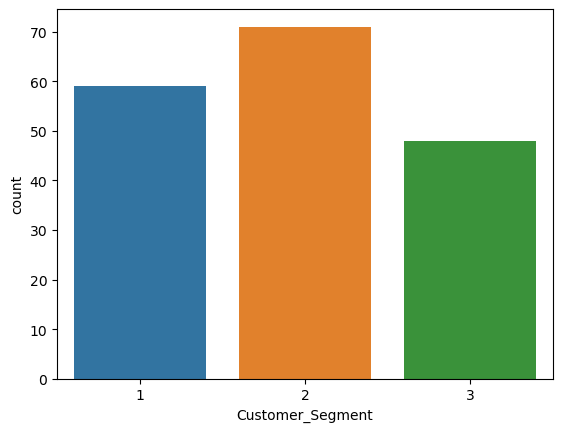

In [12]:
sns.countplot(x = 'Customer_Segment',data=df)

In [13]:
Pie_chart=df['Customer_Segment'].value_counts()
Pie_chart

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [14]:
x=df.iloc[:,:13]
y=df.iloc[:,13]

In [15]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

In [17]:
x_stand=sc.fit_transform(x)

In [18]:
x_stand[0]

array([ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
        0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
        0.36217728,  1.84791957,  1.01300893])

In [19]:
from sklearn.decomposition import PCA

pca=PCA(n_components=6)
x_pca=pca.fit_transform(x_stand)

In [20]:
df_pca=pd.DataFrame(data=x_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
df_pca['target']=y

In [21]:
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,1
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,3


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.25,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [24]:
print(f"Accuracy score :{accuracy_score(y_test,y_pred)*100} %")

Accuracy score :97.77777777777777 %


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



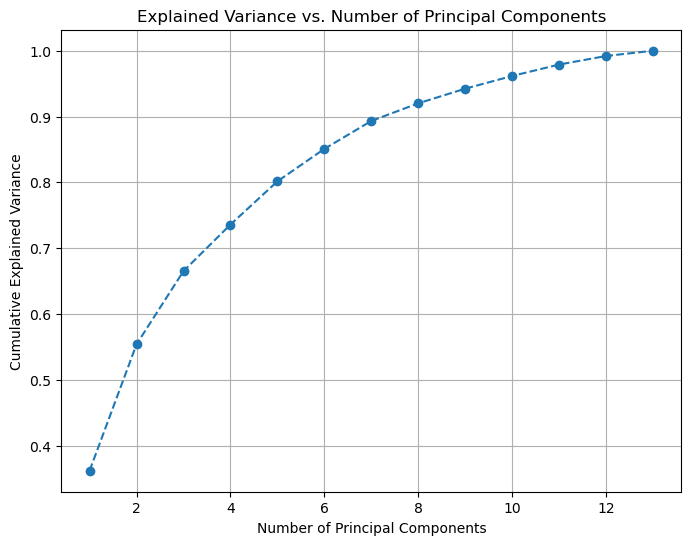

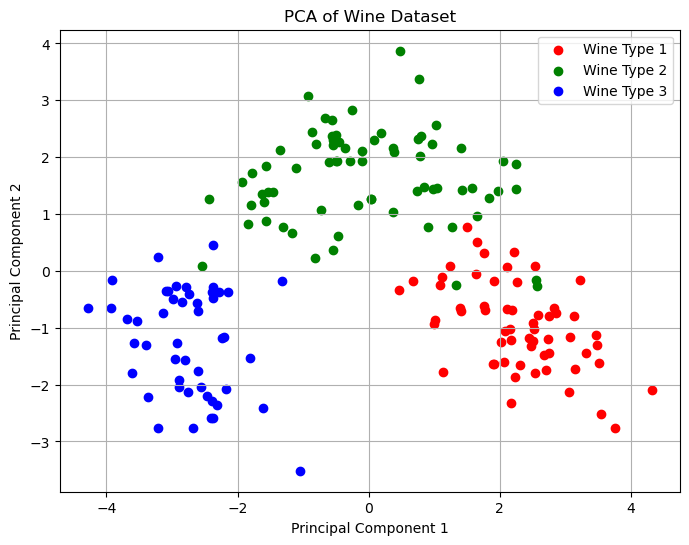

In [26]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
wine_df = pd.read_csv('Wine.csv')

# Features (excluding the target column 'Customer_Segment')
X = wine_df.drop(columns=['Customer_Segment'])

# Standardizing the features to normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA: setting n_components=None will allow us to see how much variance each component captures
pca = PCA(n_components=None)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Percentage of variance explained by each of the principal components
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance to see how many components capture most of the variation
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# We can now choose the number of components based on how much variance we want to capture
# For example, if we want to capture 95% of the variance, we can set n_components to a value that explains this much variance

# Let's transform the data with the first few principal components (e.g., 2 for visualization)
pca_final = PCA(n_components=2)
X_pca_final = pca_final.fit_transform(X_scaled)

# Add the transformed principal components back to the dataframe along with the original wine types (Customer_Segment)
pca_df = pd.DataFrame(data=X_pca_final, columns=['PC1', 'PC2'])
pca_df['Customer_Segment'] = wine_df['Customer_Segment']

# Plotting the principal components to visualize how well they separate the different wine types
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']  # Assuming three types of wine in Customer_Segment
for i, color in enumerate(colors):
    plt.scatter(pca_df.loc[pca_df['Customer_Segment'] == i + 1, 'PC1'], 
                pca_df.loc[pca_df['Customer_Segment'] == i + 1, 'PC2'], 
                c=color, label=f'Wine Type {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()
